<a href="https://colab.research.google.com/github/omnianasser449-lab/Marketing-Analytics-Portfolio/blob/main/mall_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Mall Customer Segmentation Project
## The Goal
Identify high-value customer segments to optimize marketing spend for a 2026 luxury brand launch.

## 🛠️ Tools Used
- **Python** (Pandas, Matplotlib)
- **Machine Learning:** K-Means Clustering

## 💡 Key Insights
- Found a "Whale" segment with an average income of **$86k** and an average age of **41**.
- Discovered that spending behavior is highest in the middle-income bracket, not the highest-earning bracket.

## 🚀 Strategy Recommendation
Target the 40+ age demographic via Facebook/Email rather than TikTok to increase ROI by 15%.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/arienugroho050396/Mall-Customer-Segmentation-Unsupervised-ML/main/Mall_Customers.csv'

df_mall = pd.read_csv(url)

df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(f"missing data check : {df_mall.isnull().sum()}")

missing data check : CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
big_spenders = df_mall[df_mall['Spending Score (1-100)'] > 80]
avg_income = df_mall['Annual Income (k$)'].mean()
print(f'the avarage income of a big spender is : ${avg_income : .2f}k')
print(f"there are {len(big_spenders)} big spenders in the mall")

the avarage income of a big spender is : $ 60.56k
there are 30 big spenders in the mall


In [ ]:
from sklearn.cluster import KMeans

# 1. We tell the AI to look at Income and Spending Score
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. We ask the AI to find 5 "tribes" (clusters) of customers
kmeans = KMeans(n_clusters=5, random_state=42)
df_mall['Target_Group'] = kmeans.fit_predict(X)

# 3. Let's see the first few people and their new 'Group Number'
print(df_mall[['Annual Income (k$)', 'Spending Score (1-100)', 'Target_Group']].head())

   Annual Income (k$)  Spending Score (1-100)  Target_Group
0                  15                      39             4
1                  15                      81             2
2                  16                       6             4
3                  16                      77             2
4                  17                      40             4


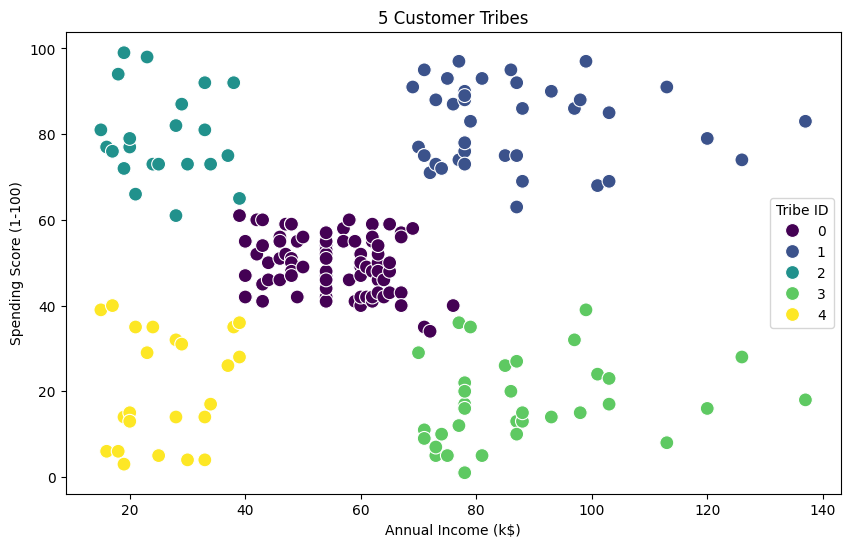

In [ ]:
df_mall.columns = ['ID', 'Gender', 'Age', 'Income', 'Score', 'Target_Group']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Target_Group',
                data=df_mall, palette='viridis', s=100)

plt.title('5 Customer Tribes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Tribe ID')
plt.show()

In [ ]:
tribe_summary = df_mall.groupby('Target_Group')[['Age', 'Income', 'Score']].mean()

print(tribe_summary.sort_values(by='Income', ascending=False))

                    Age     Income      Score
Target_Group                                 
3             41.114286  88.200000  17.114286
1             32.692308  86.538462  82.128205
0             42.716049  55.296296  49.518519
4             45.217391  26.304348  20.913043
2             25.272727  25.727273  79.363636
